# Coffee Shop Revenue Prediction with Random Forest Regressor

In this notebook, we'll build a machine learning model to predict coffee shop revenue using a Random Forest Regressor. We'll follow these steps:

1. Data Loading and EDA
2. Feature Engineering
3. Model Training with Hyperparameter Tuning
4. Model Evaluation
5. Saving the Model

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Loading and EDA

In [2]:
# Load the dataset
df = pd.read_csv('coffee_shop_revenue.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (2000, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None

First 5 rows:


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nDataset Description:")
df.describe()

Missing Values:
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

Dataset Description:


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [4]:
# Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


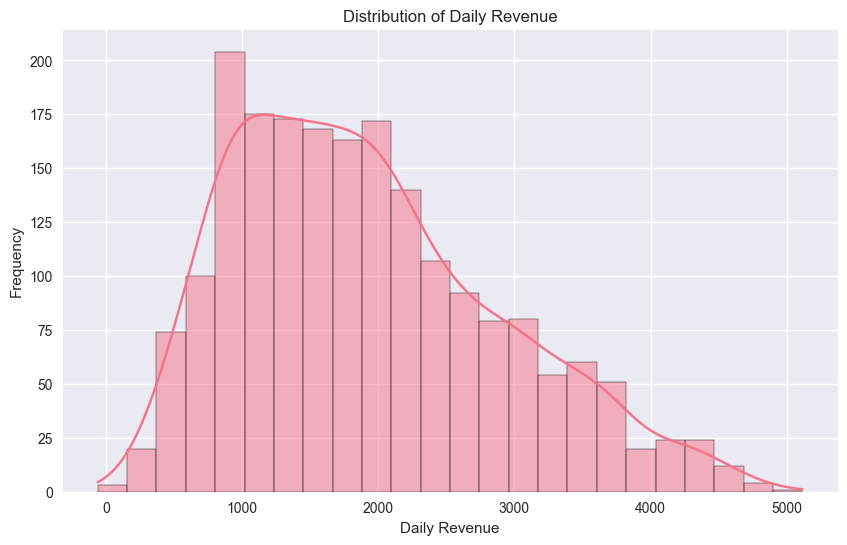

In [5]:
# Visualize the distribution of the target variable (Daily_Revenue)
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Revenue'], kde=True)
plt.title('Distribution of Daily Revenue')
plt.xlabel('Daily Revenue')
plt.ylabel('Frequency')
plt.show()

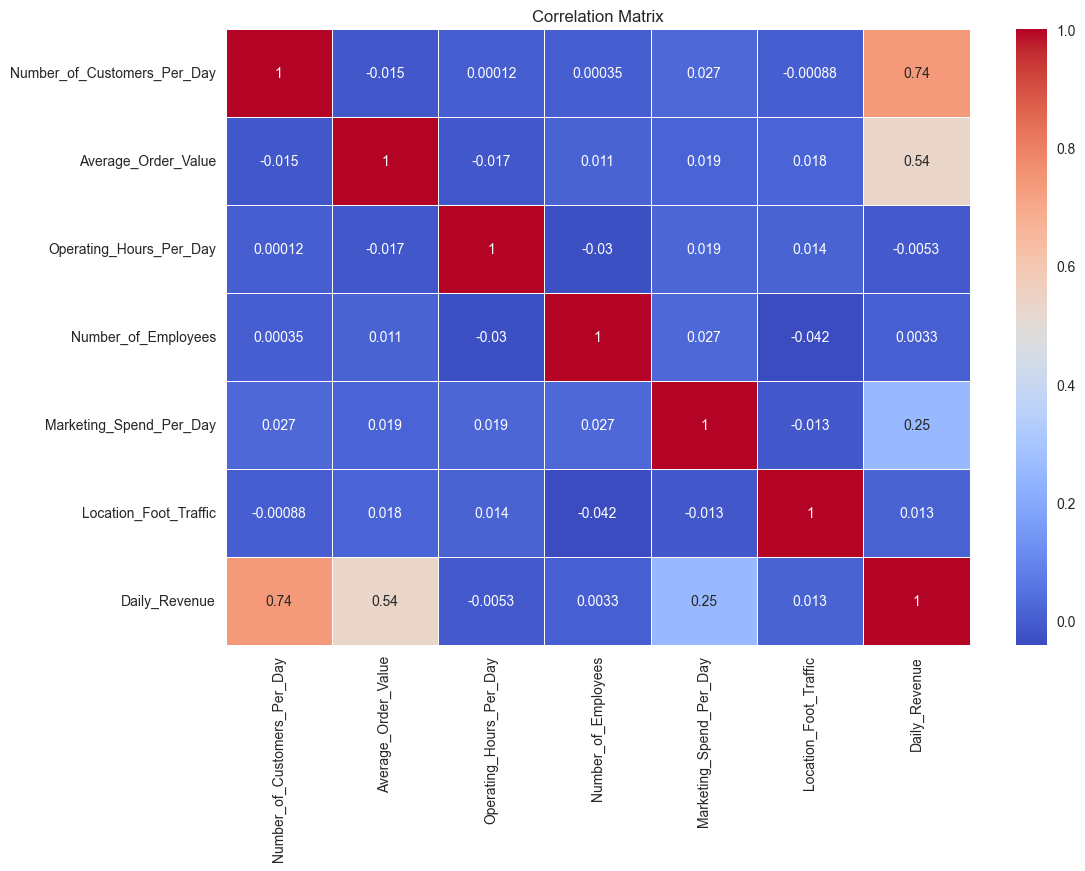

In [6]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

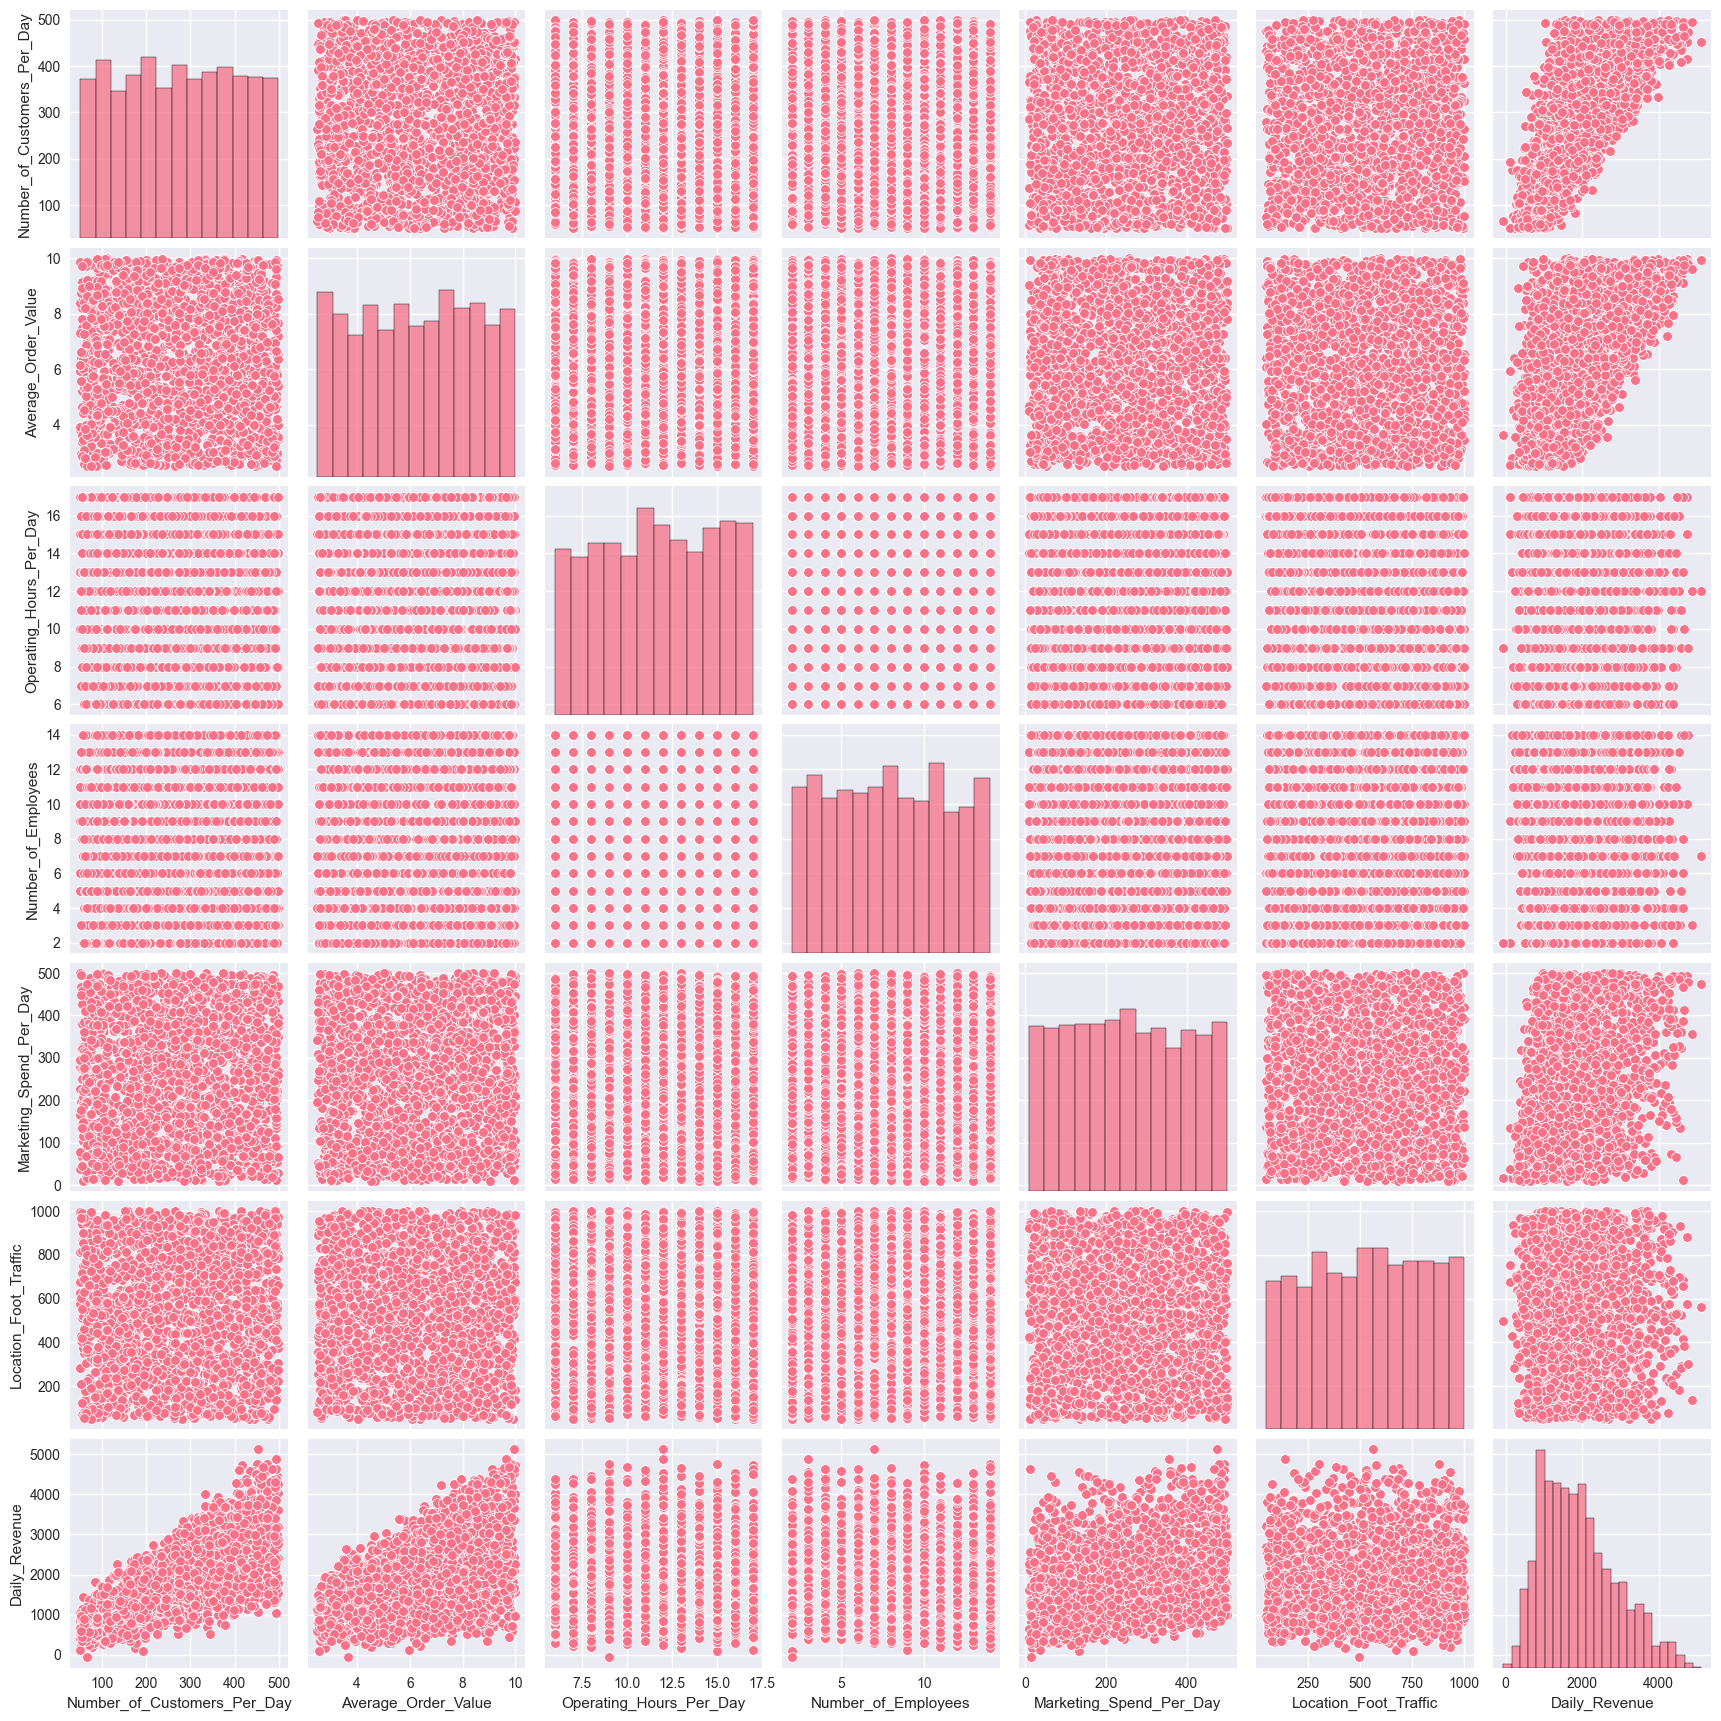

In [7]:
# Pairplot to visualize relationships
features = ['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 
            'Number_of_Employees', 'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue']
sns.pairplot(df[features])
plt.show()

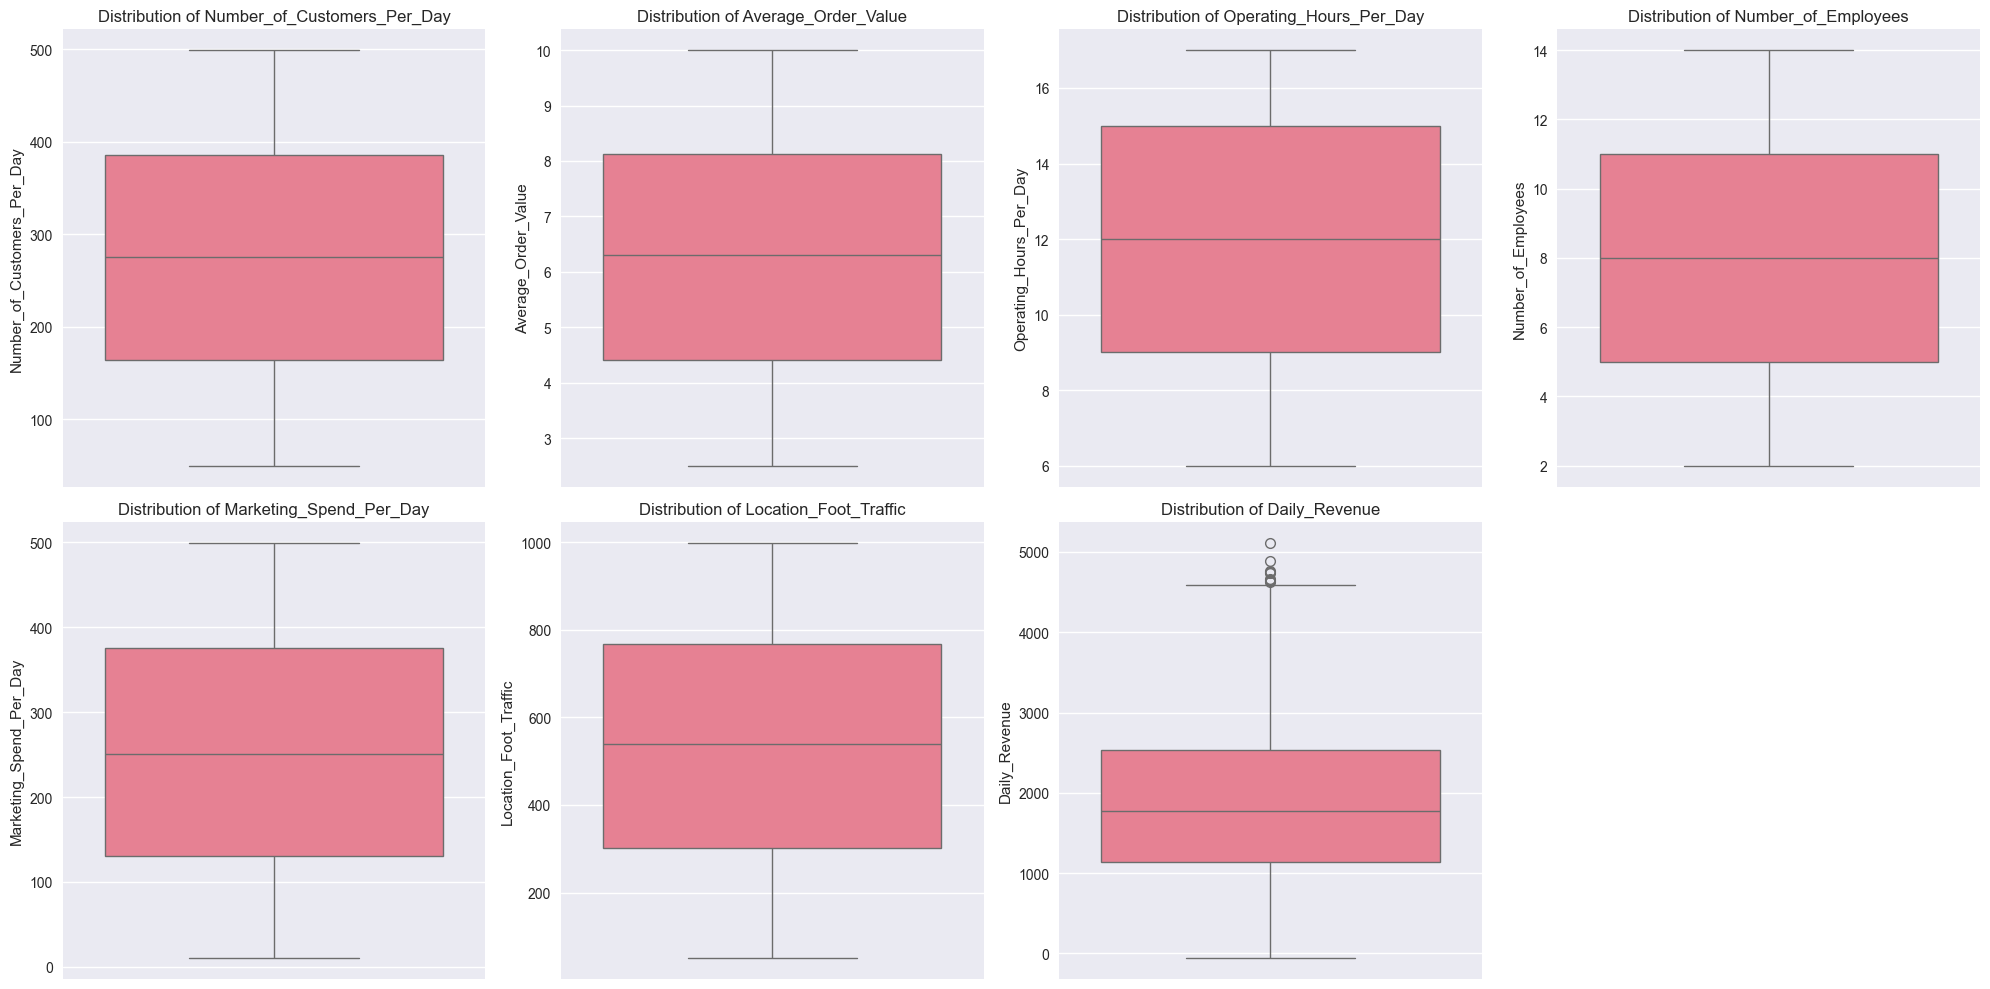

In [8]:
# Check for outliers using boxplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove the empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

## 2. Feature Engineering

In [9]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


In [10]:
# Since there are no missing values, we don't need to handle them
# Let's check if we have any categorical variables
print("Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique values in each column:
Number_of_Customers_Per_Day: 441 unique values
Average_Order_Value: 694 unique values
Operating_Hours_Per_Day: 12 unique values
Number_of_Employees: 13 unique values
Marketing_Spend_Per_Day: 1967 unique values
Location_Foot_Traffic: 831 unique values
Daily_Revenue: 1998 unique values


In [11]:
# All features are numerical, so we don't need encoding
# Let's prepare our features and target variable
X = df.drop('Daily_Revenue', axis=1)  # Features
y = df['Daily_Revenue']  # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (2000, 6)
Target shape: (2000,)


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1600, 6)
Testing set shape: (400, 6)


## 3. Model Training (Random Forest Regressor)

In [13]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV for hyperparameter tuning
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Performing hyperparameter tuning...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Score: 0.943593161968288
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Score: 0.943593161968288


In [14]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

print("Model training completed!")

Model training completed!


Feature Importance:
                       Feature  Importance
0  Number_of_Customers_Per_Day    0.571112
1          Average_Order_Value    0.366299
4      Marketing_Spend_Per_Day    0.049035
5        Location_Foot_Traffic    0.005455
2      Operating_Hours_Per_Day    0.004280
3          Number_of_Employees    0.003819


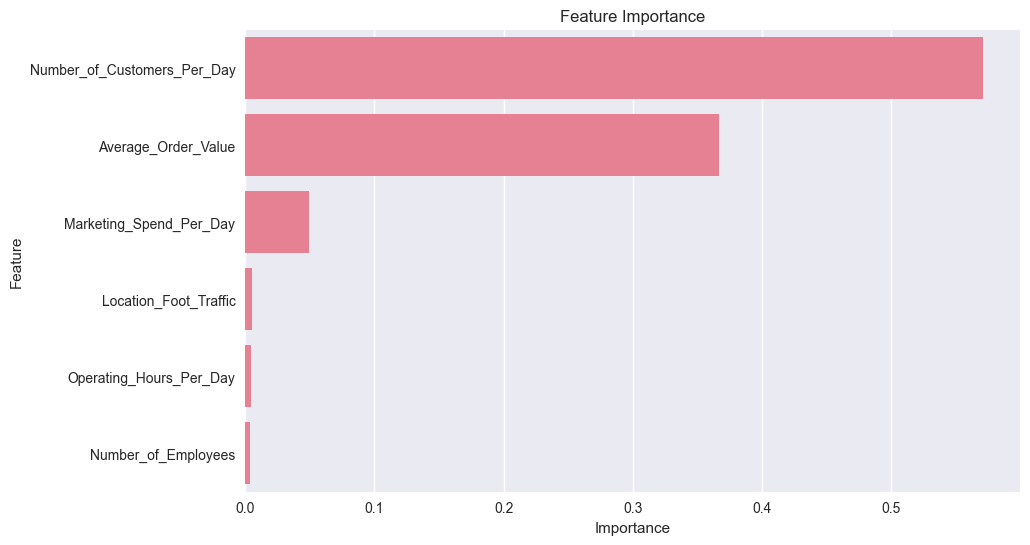

In [15]:
# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

## 4. Model Evaluation

In [16]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 179.00
Mean Squared Error (MSE): 48827.82
Root Mean Squared Error (RMSE): 220.97
R² Score: 0.9477


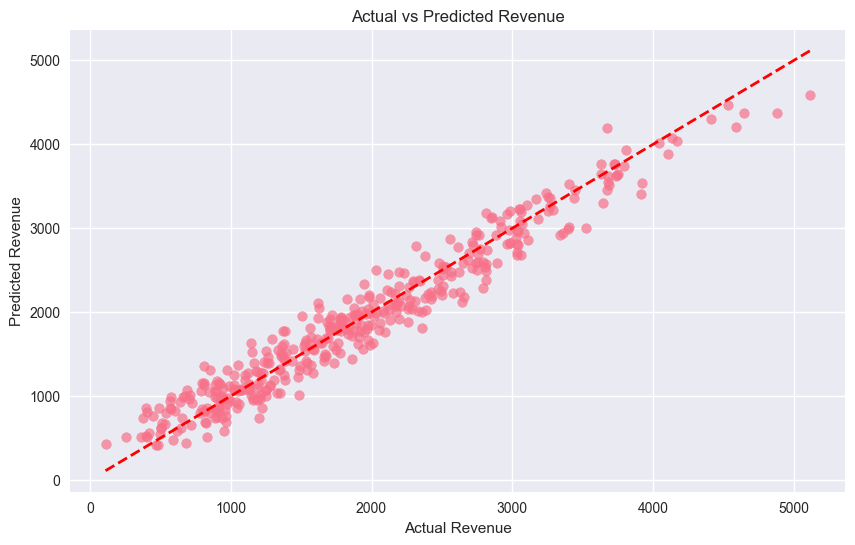

In [17]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

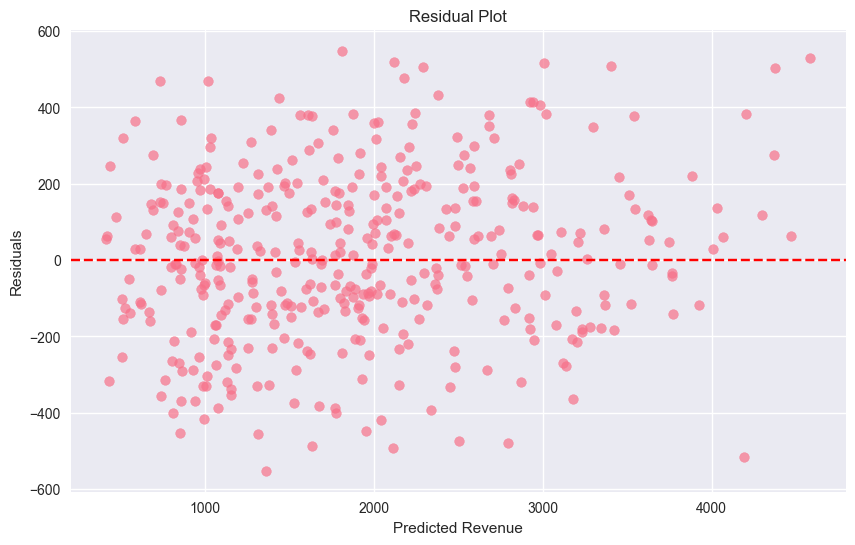

In [18]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## 5. Save the Trained Model

In [19]:
# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


In [20]:
# Save the feature columns for use in the Streamlit app
feature_columns = list(X.columns)
with open('feature_columns.pkl', 'wb') as file:
    pickle.dump(feature_columns, file)

print("Feature columns saved as 'feature_columns.pkl'")

Feature columns saved as 'feature_columns.pkl'


In [21]:
print("Project completed successfully!")
print("\nSummary:")
print(f"- Dataset shape: {df.shape}")
print(f"- Features used: {list(X.columns)}")
print(f"- Model R² Score: {r2:.4f}")
print("- Model saved as 'model.pkl'")
print("- Feature columns saved as 'feature_columns.pkl'")

Project completed successfully!

Summary:
- Dataset shape: (2000, 7)
- Features used: ['Number_of_Customers_Per_Day', 'Average_Order_Value', 'Operating_Hours_Per_Day', 'Number_of_Employees', 'Marketing_Spend_Per_Day', 'Location_Foot_Traffic']
- Model R² Score: 0.9477
- Model saved as 'model.pkl'
- Feature columns saved as 'feature_columns.pkl'
